In [44]:
import numpy as np 
import pandas as pd 
import tensorflow as tf 
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt 
from keras.optimizers import RMSprop

In [7]:
data = pd.read_csv('train.csv')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [12]:
y = data['label']
x = data.drop(labels=['label'], axis=1)

In [15]:
y.shape, x.shape

((42000,), (42000, 784))

In [19]:
unique = data['label'].unique()
unique , len(unique) # so there are 10 unique value mainly from 0 to 9

(array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6], dtype=int64), 10)

In [20]:
# splitting the dataset into training and test data set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [22]:
# now we need to rehsape our dataset
x_train = x_train.values.reshape(-1,28,28,1)
x_test = x_test.values.reshape(-1,28,28,1)

In [26]:
# determine the shape of input image
in_shape = x_train.shape[1:]
in_shape

(28, 28, 1)

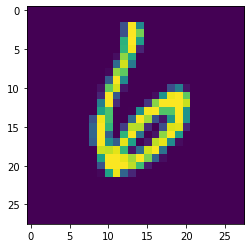

In [29]:
plt.imshow(x_train[0].reshape([28,28]))

In [31]:
# now we need to normalize the pixel values
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

In [32]:
# now we will initialize the CNN
cnn = tf.keras.models.Sequential()

In [33]:
# now we will add our first convolution layer
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape = in_shape))

In [34]:
# adding our second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape = in_shape))

In [35]:
# now we will do max pooling, again, there are many other techiniques availaible, like min pooling, and several others.
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [ ]:
# adding yet another conolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu')

In [38]:
# adding yet another concolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'))

In [39]:
# now, again we do max pooling 
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [40]:
# flatenning the layer to feed it into our artificial neural network
cnn.add(tf.keras.layers.Flatten())

In [41]:
# doing full connection now
cnn.add(tf.keras.layers.Dense(units = 256, activation = 'relu'))

In [42]:
# our final output layer
cnn.add(tf.keras.layers.Dense(units = 10, activation = 'softmax'))

In [45]:
# defining our optimizer
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [46]:
# compilig our CNN model
cnn.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [47]:
# now training our model
cnn.fit(x_train, y_train, validation_split=0.2, epochs= 100, batch_size=128, verbose=1)

Epoch 1/100
210/210 [==============================] - 75s 357ms/step - loss: 0.9596 - accuracy: 0.6933 - val_loss: 0.3422 - val_accuracy: 0.9048
Epoch 2/100
210/210 [==============================] - 72s 342ms/step - loss: 0.2657 - accuracy: 0.9177 - val_loss: 0.2071 - val_accuracy: 0.9423
Epoch 3/100
210/210 [==============================] - 76s 364ms/step - loss: 0.1705 - accuracy: 0.9472 - val_loss: 0.1519 - val_accuracy: 0.9555
Epoch 4/100
210/210 [==============================] - 72s 342ms/step - loss: 0.1256 - accuracy: 0.9593 - val_loss: 0.1323 - val_accuracy: 0.9621
Epoch 5/100
210/210 [==============================] - 70s 336ms/step - loss: 0.1039 - accuracy: 0.9671 - val_loss: 0.1235 - val_accuracy: 0.9634
Epoch 6/100
210/210 [==============================] - 74s 352ms/step - loss: 0.0862 - accuracy: 0.9725 - val_loss: 0.1000 - val_accuracy: 0.9689
Epoch 7/100
210/210 [==============================] - 80s 380ms/step - loss: 0.0780 - accuracy: 0.9747 - val_loss: 0.0931 -

In [62]:
# making a single prediction
image = x_test[2]
y_pred = cnn.predict(np.asarray([image]))
y_pred

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

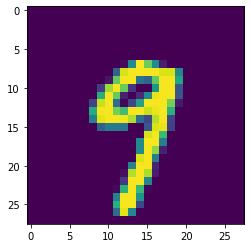

In [63]:
plt.imshow(x_test[2].reshape([28,28]))

In [64]:
# now making the predictions over test data set
test_data = pd.read_csv('test.csv')
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [65]:
# normalizing the test data
test = test_data / 255.0

In [66]:
# rshaping the test data
test_final_data = test.values.reshape(-1,28,28,1)

In [67]:
# predicting the model
label = cnn.predict(test_final_data)
label

array([[0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [68]:
label.shape

(28000, 10)

In [69]:
label = np.argmax(label, axis=1)

In [70]:
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [71]:
#Creating the file ready with rows and Columns feild
index = test_data.index.values + 1
data = {'ImageId' : index, "Label" : label}
df = pd.DataFrame(data=data)
df.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


In [72]:
submit_file = pd.DataFrame({'ImageId' : index, "Label" : label.astype(int).ravel()})
submit_file.to_csv("submission.csv",index = False)

In [73]:
submit_file

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
